In [967]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [968]:
pumpkins = pd.read_csv('pumpkin.csv')
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


By the bushel

In [969]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [970]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [971]:
columns =  ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins[columns]
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,10/8/16
...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,9/30/16
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,9/30/16
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,9/30/16
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,9/30/16


Find Average Price for a given month

In [972]:
pumpkins['Price'] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] /= (1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] /= (1/2)
pumpkins['Date'] = pd.to_datetime(pumpkins['Date'])
pumpkins['Month'] = pumpkins['Date'].dt.month
pumpkins['DayOfYear'] = pumpkins['Date'].dt.dayofyear
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date,Price,Month,DayOfYear
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,2016-09-24,13.50,9,268
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,2016-09-24,16.20,9,268
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,2016-10-01,16.20,10,275
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,2016-10-01,15.30,10,275
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,2016-10-08,13.50,10,282
...,...,...,...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,2016-09-30,30.00,9,274
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,2016-09-30,28.75,9,274
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,2016-09-30,25.75,9,274
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,2016-09-30,24.00,9,274


In [973]:
def average_given_month(df, month):
    avg = df[df['Month'] == month][['Price']].mean()
    return pd.DataFrame({"Average":avg})

In [974]:
avg = average_given_month(pumpkins,9)
avg

,Average
Price,28.544384


Visualizing

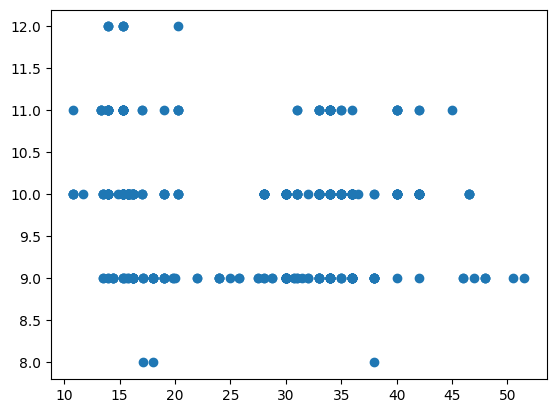

In [975]:
price = pumpkins.Price
month = pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

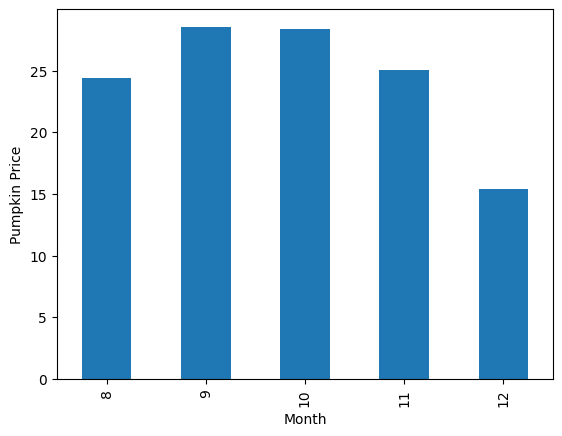

In [976]:
pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

<function matplotlib.pyplot.show(close=None, block=None)>

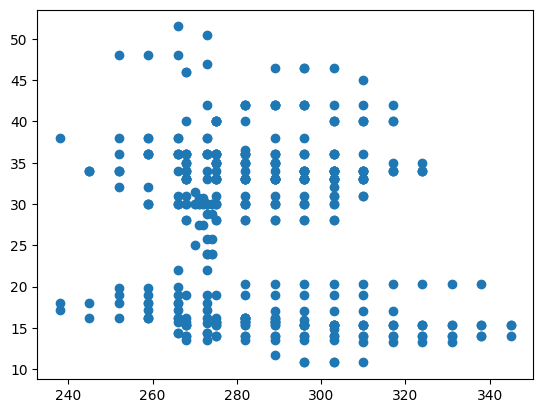

In [977]:
plt.scatter('DayOfYear','Price',data=pumpkins)
plt.show

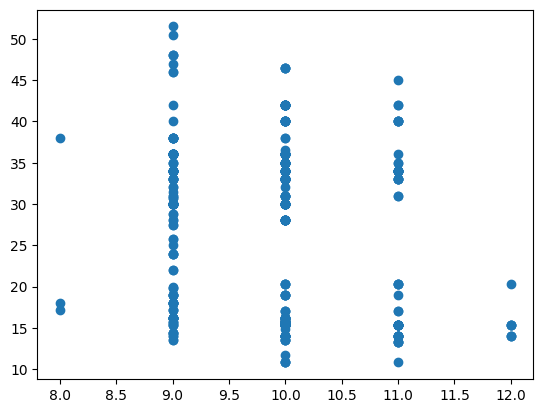

In [978]:
plt.scatter('Month','Price',data=pumpkins)
plt.show()

In [979]:
print(pumpkins['Month'].corr(pumpkins['Price']))
print(pumpkins['DayOfYear'].corr(pumpkins['Price']))


-0.14912913634278593
-0.1669009250593448


Are prices according to variety?

c:\Users\elwal\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


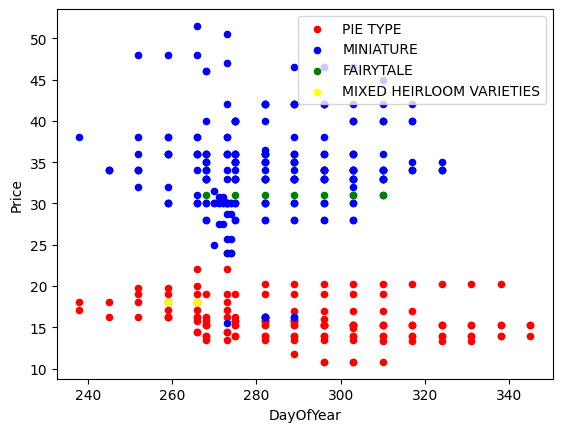

In [980]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(pumpkins['Variety'].unique()): #for all varieties plot price for days of the year
    df = pumpkins[pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot: xlabel='Variety'>

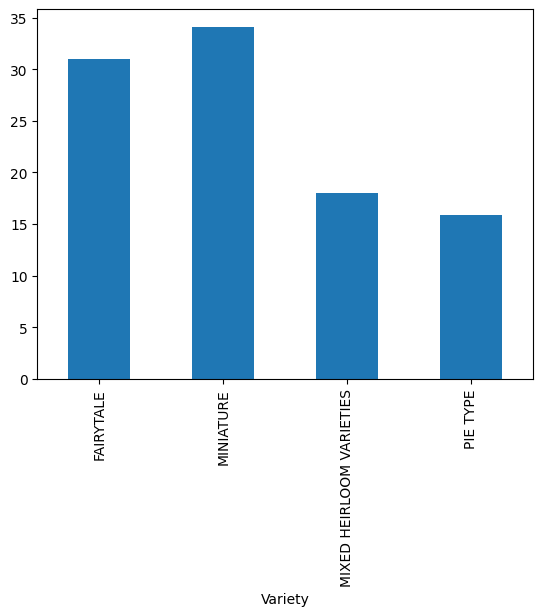

In [981]:
pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')


In [982]:
pie_pumpkins = pumpkins[pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.26678559691441894


We see a correlation above so we can try linear regression to predict pumpkin prices

In [983]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins

C:\Users\elwal\AppData\Local\Temp\ipykernel_18116\3672826049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


,Package,Variety,City Name,Low Price,High Price,Date,Price,Month,DayOfYear
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,2016-09-24,13.5,9,268
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,2016-09-24,16.2,9,268
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,2016-10-01,16.2,10,275
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.0,17.0,2016-10-01,15.3,10,275
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,2016-10-08,13.5,10,282
...,...,...,...,...,...,...,...,...,...
1626,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,12.0,12.0,2016-10-22,10.8,10,296
1627,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,12.0,12.0,2016-10-29,10.8,10,303
1628,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,18.0,20.0,2017-08-26,17.1,8,238
1629,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,18.0,18.0,2017-09-16,16.2,9,259


In [984]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1) #we will train based on day of year
y = pie_pumpkins['Price'] #the ground truth is the original prices which we aim to predict

In [985]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [986]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [987]:
pred = model.predict(X_test)
model.score(X_test,y_test)

0.043080200504709065

In [988]:
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.27 (14.3%)


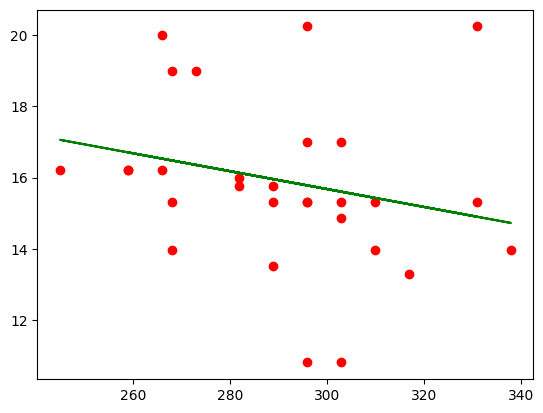

In [989]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test,pred, color = 'green')
plt.show()

We note its not that accurate so we may want to try polynomial regression.

In [990]:
model_2 = make_pipeline(PolynomialFeatures(2), LinearRegression()) #square the inputs added to together for example, (x+y+z)^2, then preform linear regression on that
model_2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [991]:
pred_2 = model_2.predict(X_test)

model_2.score(X_test,y_test)

0.06761367993671474

In [992]:
mse_2 = np.sqrt(mean_squared_error(y_test,pred_2))
print(f'Mean error: {mse_2:3.3} ({mse_2/np.mean(pred_2)*100:3.3}%)')


Mean error: 2.24 (14.1%)


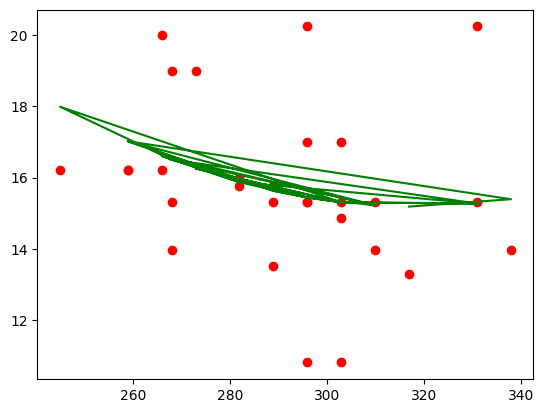

In [993]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test,pred_2, color = 'green')
plt.show()

Is variety sufficient enough to predict price?

<AxesSubplot: xlabel='Variety'>

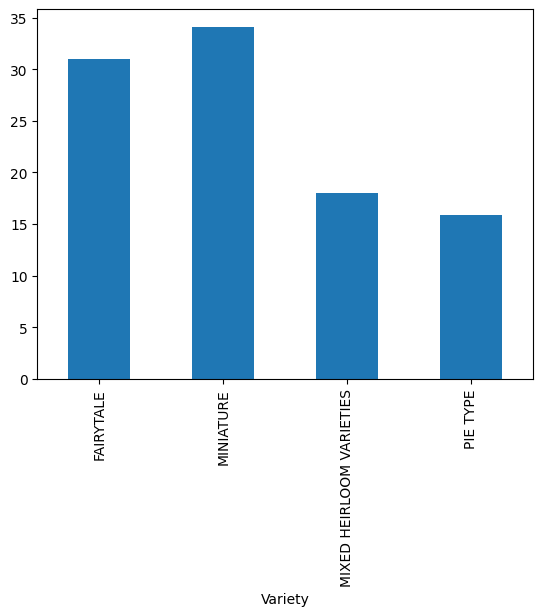

In [994]:
pumpkins.groupby('Variety')['Price'].mean().plot(kind = 'bar')

In [995]:
var_one_hot = pd.get_dummies(pumpkins['Variety'])
print(var_one_hot.corrwith(pumpkins['Price']))

FAIRYTALE                   0.044396
MINIATURE                   0.857832
MIXED HEIRLOOM VARIETIES   -0.068122
PIE TYPE                   -0.871526
dtype: float64


In [996]:
X,y = var_one_hot, pumpkins['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [997]:
model_3 = LinearRegression()
model_3.fit(X_train,y_train)

LinearRegression()

In [998]:
model_3.score(X_test,y_test)

0.7729974794319043

Lets do a bunch of features together

In [999]:
X =pd.get_dummies(pumpkins['Variety']).join(pumpkins['Month']).join(pd.get_dummies(pumpkins['City Name'])).join(pd.get_dummies(pumpkins['Package']))
y = pumpkins['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [1000]:
model_4 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_4.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [1001]:
pred_4 = model_4.predict(X_test)
print(model_4.score(X_train, y_train))
print(model_4.score(X_test, y_test))

0.9588109517467943
0.9520210235632296


In [1002]:
mse = np.sqrt(mean_squared_error(y_test,pred_4))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred_4)*100:3.3}%)')

Mean error: 2.28 (8.41%)
